# Homework 3

## IRIS data

In [7]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
iris_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv')

To find out if there is a relationship between sepal dimensions and petal dimensions we generate the following figure.

<Axes: xlabel='sepal_width', ylabel='petal_width'>

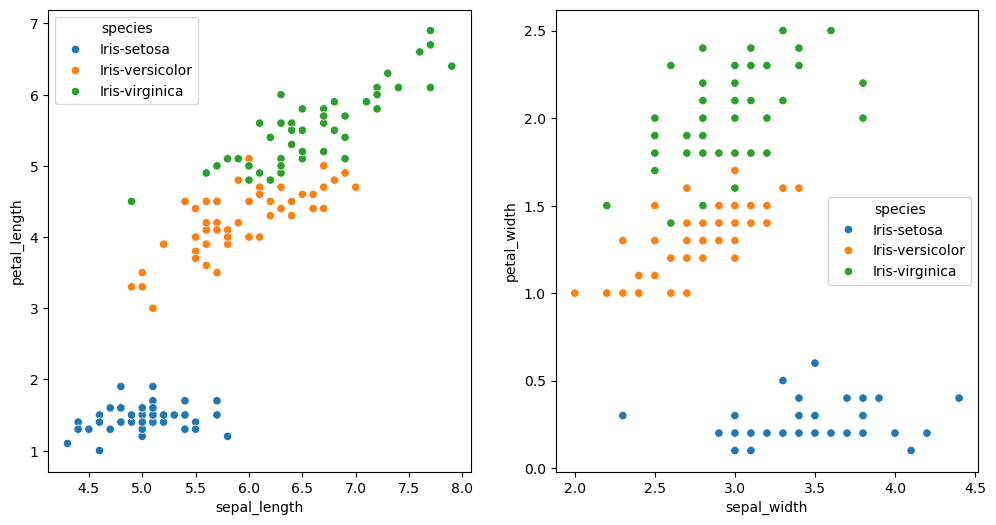

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x = iris_df['sepal_length'], y = iris_df['petal_length'], hue = 'species', data = iris_df, ax = ax[0])
sns.scatterplot(x = iris_df['sepal_width'], y = iris_df['petal_width'], hue = 'species', data = iris_df, ax = ax[1])

We see that the flower Iris-setosa with shorter sepal and petal length have greater sepal width. Both the other species seem to have a correlation between sepal and petal length and sepal and petal width. 

Now we generate the following figure to see how the sepal and petal dimensions are distributed.

<Axes: xlabel='species', ylabel='petal_length'>

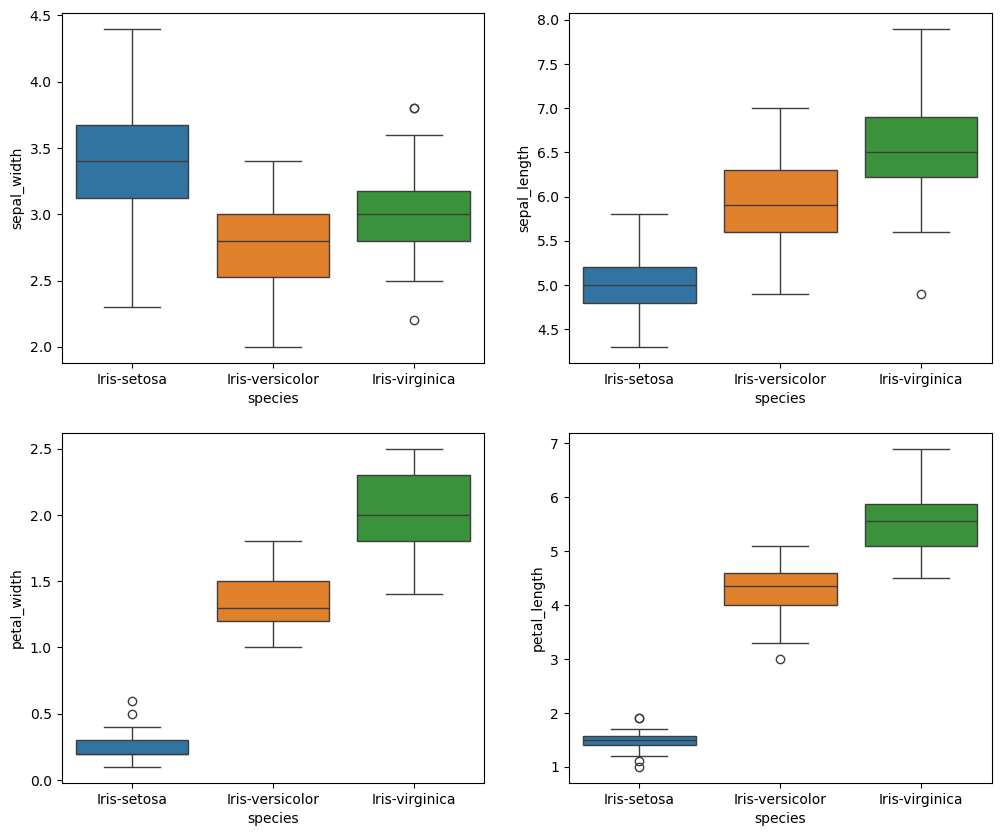

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(x = iris_df['species'], y = iris_df['sepal_width'], hue ='species', data = iris_df, ax=ax[0,0])
sns.boxplot(x = iris_df['species'], y = iris_df['sepal_length'], hue ='species', data = iris_df, ax=ax[0,1])
sns.boxplot(x = iris_df['species'], y = iris_df['petal_width'], hue ='species', data = iris_df, ax=ax[1,0])
sns.boxplot(x = iris_df['species'], y = iris_df['petal_length'], hue ='species', data = iris_df, ax=ax[1,1])

From the figure we can conclude that the sepal width does not vary much between species but regarding petal width, petal length and sepal length Iris virginica has the highest values, followed by Iris versicolor and lastly Iris setosa. We can also see that we have some outliers but that they are not extreme. Lastly, we can see how the flowers' values values, for example that Iris setosa varies more in sepal width than the other two and that all three seem to vary equally in sepal length. 

Lastly we plot the pair-plot to analyse the relationship between data. 

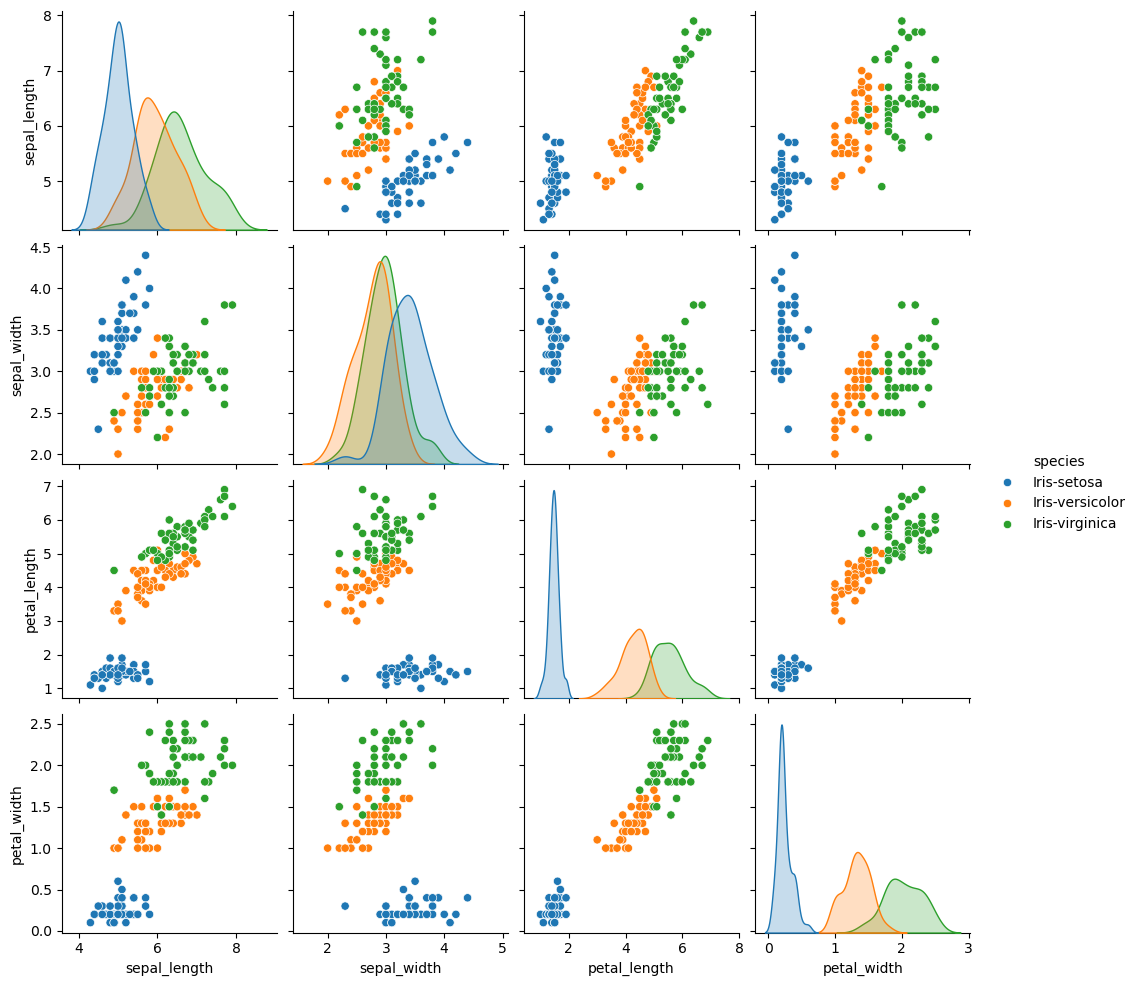

In [15]:
sns.pairplot(iris_df, hue = 'species')

It looks like petal length and petal width has a somewhat linear relationship as well as sepal length and petal width. 

## Birdwatching

In [18]:
bird_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv')
clean_bird_df = bird_df.copy()

#set Antal to NaN if users have entered text instead of a numerical value.
clean_bird_df['Antal'] = clean_bird_df['Antal'].astype(str) \
    .replace(['noterad', 'Ej återfunnen'], np.nan) \
    .astype(float)

#drop rows with value Nan in 'Antal'. 
clean_bird_df = clean_bird_df.dropna(subset = ['Antal']) 

sorted_bird_df = clean_bird_df[['Artnamn', 'Antal']]\
    .groupby('Artnamn')\
    .sum()\
    .sort_values('Antal', ascending = False)
sorted_bird_df.head(3)

,Antal
Artnamn,
Grönsiska,20211.0
Sothöna,8308.0
Gräsand,7167.0


The most prevelant species is the Grönsiska. It can be discussed if one should set text entered in 'Antal' to one since the user has seen at least one at some point. But seeing as the true value could be anything, I argue it is equally "wrong" to put NaN as any other value. 
We now plot the monthly distribution of the top 3 most prevelant species with month being decided by 'Startdatum'. 

<Axes: xlabel='Startdatum', ylabel='Antal'>

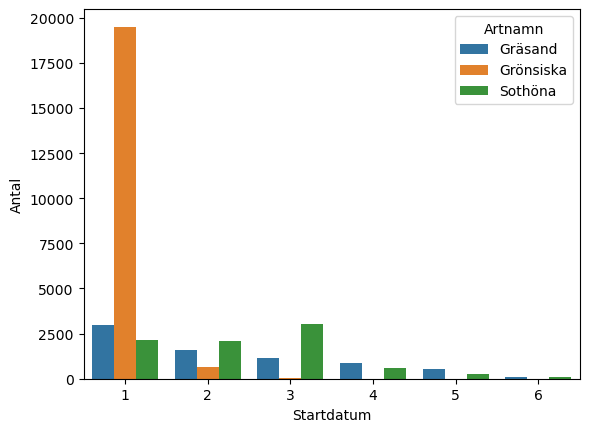

In [21]:
top_three = clean_bird_df[['Artnamn', 'Antal', 'Startdatum']]\
            .loc[(clean_bird_df['Artnamn'] == 'Grönsiska') | 
            (clean_bird_df['Artnamn'] == 'Sothöna') | 
            (clean_bird_df['Artnamn'] == 'Gräsand')]\
        .sort_values('Artnamn')

top_three['Startdatum'] = pd.to_datetime(top_three['Startdatum']).dt.month

grouped_top_three = top_three.groupby(['Artnamn', 'Startdatum'])[['Antal']].sum().reset_index() #reset_index so Artnamn and Startdatum 
#are still accessable as columns despite the groupby action.

sns.barplot(x = 'Startdatum', y = 'Antal', hue = 'Artnamn', data = grouped_top_three)

The rarest species have been spotted one time, see the list below. 

In [24]:
sorted_bird_df.loc[sorted_bird_df['Antal'] == 1]

,Antal
Artnamn,
Ägretthäger,1.0
Lappsparv,1.0
Vinterhämpling,1.0
Varfågel,1.0
Bivråk,1.0
Bändelkorsnäbb,1.0
Trädlärka,1.0
Strömstare,1.0
Gravand,1.0


Now, three questions generated by me. 
1. In which municipality have the most Knölsvan been spotted?\
2. Who has rapported the most bird-sightings?\
3. What is the monthly distribution of birds? 

### Answer 1

In [28]:
bird_per_mu_df = clean_bird_df[['Kommun', 'Artnamn', 'Antal']]\
    .groupby(['Kommun', 'Artnamn'])\
    .sum()\
    .reset_index()

bird_per_mu_df.loc[bird_per_mu_df['Artnamn'] == 'Knölsvan'].sort_values('Antal', ascending = False).head(1)


,Kommun,Artnamn,Antal
303,Stockholm,Knölsvan,1412.0


### Answer 2

In [30]:
bird_rapport = bird_df[['Rapportör']].copy()
bird_rapport['Antal rapporter'] = 1
bird_rapport.groupby('Rapportör').sum().sort_values('Antal rapporter', ascending = False).head(1)

,Antal rapporter
Rapportör,
Svante Söderholm,5428


### Answer 3

<Axes: xlabel='Startdatum', ylabel='Antal'>

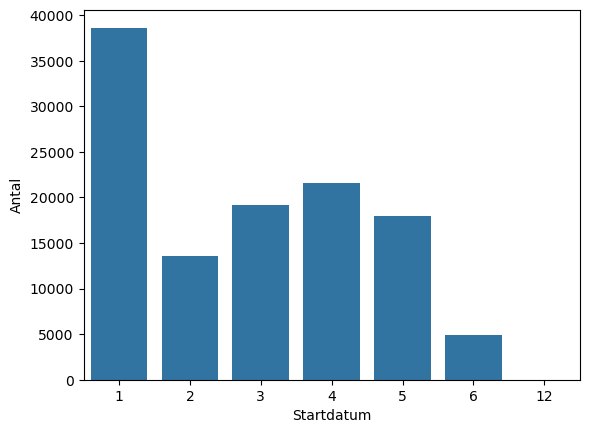

In [32]:
bird_per_mo_df = clean_bird_df[['Startdatum', 'Antal']].copy()

bird_per_mo_df['Startdatum'] = pd.to_datetime(bird_per_mo_df['Startdatum']).dt.month

bird_per_mo_df = bird_per_mo_df.groupby('Startdatum').sum()

sns.barplot(x = 'Startdatum', y = 'Antal', data = bird_per_mo_df)

Answer 3 is interesting beacuse I thought most birds would be spotted in the spring since that is when they migrate back to Sweden. However, a possible explanation could be that birds are more visible in January since nature does not offer a lot of food option as opposed to places where humans have put up feeding stations. We can also note that the data mostly contains data from the first half of the year (Jan-Jun).\
The questions and answers can give us insights such as where specific species tend to stay, who is most active in the data and possible patterns in migration. 

## Predicting strokes 

In [35]:
stroke_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')
print(stroke_df.info())
print(stroke_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female

Above we can see which variables we have as well as their data type. 

<Axes: xlabel='Residence_type', ylabel='Count'>

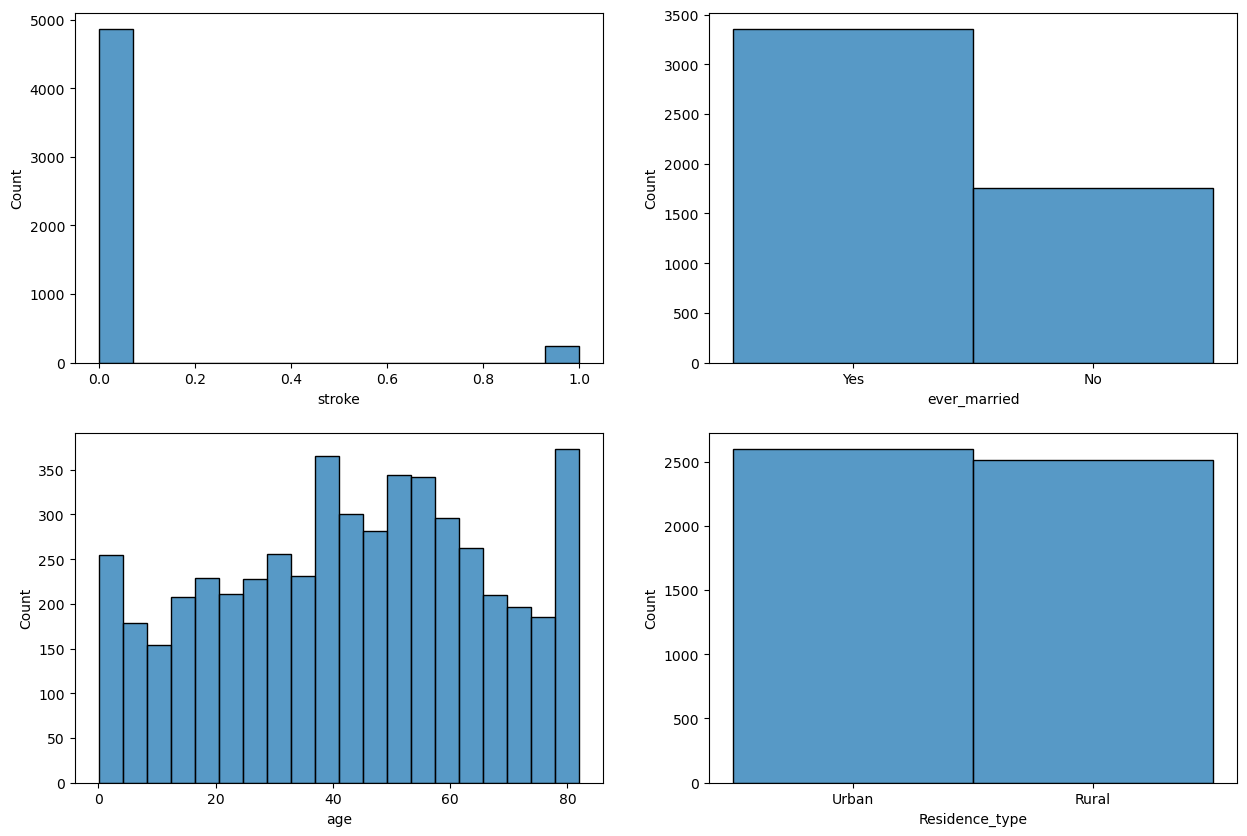

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(stroke_df['stroke'], ax=ax[0,0])
sns.histplot(stroke_df['ever_married'], ax=ax[0,1])
sns.histplot(stroke_df['age'], ax=ax[1,0])
sns.histplot(stroke_df['Residence_type'], ax=ax[1,1])

From the figure above we know that stroke is represented by $0$ and $1$. It also seems that there are a lot of people who have not had a stroke in this data, it is not balanced. We see that about a third of the data have not ever been married and that age is balanced as well as residence type. 
We will now see if we have any correlation between some of the variables. 

<Axes: xlabel='age', ylabel='bmi'>

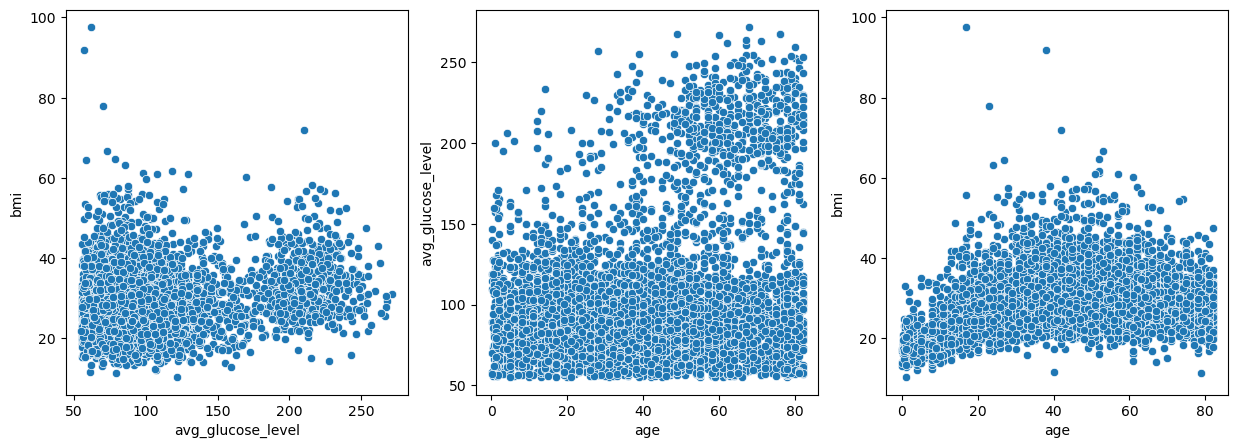

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.scatterplot(x = 'avg_glucose_level', y = 'bmi', data = stroke_df, ax=ax[0])
sns.scatterplot(x = 'age', y = 'avg_glucose_level', data = stroke_df, ax=ax[1])
sns.scatterplot(x = 'age', y = 'bmi', data = stroke_df, ax=ax[2])

None of the variables I have chosen to look at seem to be correlated. 

### Three serious questions that will give you insight

1. Do different age groups differ in stroke prevalence?\
2. Do people who have been married have a greater risk of having a stroke?\
3. Do people who live in urban areas have a greater risk of having a stroke?\

## Cleaning data

In [54]:
phone_df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv') 
phone_df.info()
phone_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso-3   214 non-null    object 
 1   1960    200 non-null    float64
 2   1965    200 non-null    float64
 3   1966    0 non-null      float64
 4   1967    0 non-null      float64
 5   1968    0 non-null      float64
 6   1969    0 non-null      float64
 7   1970    200 non-null    float64
 8   1971    0 non-null      float64
 9   1972    0 non-null      float64
 10  1973    0 non-null      float64
 11  1974    0 non-null      float64
 12  1975    200 non-null    float64
 13  1976    200 non-null    float64
 14  1977    200 non-null    float64
 15  1978    200 non-null    float64
 16  1979    200 non-null    float64
 17  1980    200 non-null    object 
 18  1981    199 non-null    object 
 19  1982    199 non-null    object 
 20  1983    198 non-null    object 
 21  1984    196 non-null    object 
 22  19

,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k


In [172]:
pd.set_option('future.no_silent_downcasting', True) #smth an error message told me to enter

clean_phone_df = phone_df.copy() 

for n in range(len(clean_phone_df)): #replacing first year-column value with 0.0 if it's NaN so I can forward fill 
    if np.isnan(clean_phone_df.loc[n, '1960']):
        clean_phone_df.loc[n, '1960'] = 0.0
    else:
        continue

clean_phone_df = clean_phone_df.ffill(axis=1)

clean_phone_df.iloc[:,1:] = (clean_phone_df\
                            .iloc[:,1:]\
                            .replace({'k':'e3', 'M':'e6', 'B':'e9'}, regex = True))\
                            .astype(float) #does not turn the chosen columns to floats for some reason? 

#turning relevant columns to floats

as_numerical = clean_phone_df.iloc[:,1:].astype(float)

clean_phone_df = pd.concat([clean_phone_df.iloc[:, 0:1], as_numerical], axis=1)

(clean_phone_df[['iso-3', '2015', '2016', '2017', '2018', '2019']].sort_values('2015', ascending = False).head())

,iso-3,2015,2016,2017,2018,2019
35,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
87,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
200,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
86,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
26,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
